In [1]:
!pip install rapidfuzz
!pip install matplotlib
!pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 21.0 MB/s eta 0:00:00


In [2]:
import requests #Fetches data from web APIs
import pandas as pd #Manipulates and analyses tabular data.
import matplotlib.pyplot as plt #Creates static, interactive and animated visualisation in Python
from wordcloud import WordCloud #Generates visual representations of word frequencies
from sklearn.feature_extraction.text import TfidfVectorizer #Convert to TF-IDF vector
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import TSNE #Reduces dimensionality of high-dimensional data for visu
import numpy as np #Numerical operations on arrays
from rapidfuzz import process, fuzz  # Faster alternative to fuzzywuzzy
from sklearn.preprocessing import LabelEncoder  # For encoding genre labels,
#Since genres can have multiple categories per anime (e.g.,
#"Action", "Adventure", "Fantasy"), we combined the genres and encoded them as a single string,
#then used LabelEncoder to assign numeric values to each genre combination.
import time #time-related functions
# === 1. Fetch Anime Data from MyAnimeList API ===
CLIENT_ID = "bdb4091f240563235f68cb257e9d6f80"
BASE_URL = "https://api.myanimelist.net/v2"

def fetch_anime_list(offset=0, limit=500):
    """Fetch anime rankings from MAL API."""
    url = f"{BASE_URL}/anime/ranking"
    headers = {"X-MAL-CLIENT-ID": CLIENT_ID}
    params = {
        "ranking_type": "all",
        "limit": limit,
        "offset": offset,
        "fields": "id,title,alternative_titles,genres,mean,num_list_users,id,synopsis,start_date,media_type,studios,producers,licensors"
    }

    response = requests.get(url, headers=headers, params=params)

    if response.status_code != 200:
        raise Exception(f"Error: {response.status_code}, {response.json()}")

    return response.json()["data"]

# === 2. Fetch Different Ranking Ranges ===
anime_data_1 = fetch_anime_list(offset=0, limit=500)  # Top 500 (1-500)
time.sleep(1)

anime_data_2 = fetch_anime_list(offset=500, limit=500)  # Mid-tier (500-1000)
time.sleep(1)

anime_data_3 = fetch_anime_list(offset=2000, limit=500)  # Lower (2000-2500)
time.sleep(1)

anime_data_4 = fetch_anime_list(offset=4000, limit=500)  # Bottom (4000-4500)
time.sleep(1)

anime_data_5 = fetch_anime_list(offset=2000, limit=500)  # Old School (2000-2500)
time.sleep(1)

anime_data_6 = fetch_anime_list(offset=1000, limit=500)  # Mid-Low (1000-1500)
time.sleep(1)

anime_data_7 = fetch_anime_list(offset=1500, limit=500)  # Mid-Low (1000-1500)
time.sleep(2)

anime_data_8 = fetch_anime_list(offset=500, limit=500)  # Mid-tier (500-1000)
time.sleep(2)

anime_data_9 = fetch_anime_list(offset=3000, limit=500)  # Mid-tier (500-1000)
time.sleep(2)

anime_data_10 = fetch_anime_list(offset=500, limit=500)  # Mid-tier (500-1000)
time.sleep(2)

# === 3. Filter Data by Year ===
def filter_by_year(data, min_year, max_year):
    """Filter anime released within a given range."""
    return [
        anime for anime in data
        if min_year <= int(anime["node"].get("start_date", "0000-00-00").split("-")[0]) <= max_year
    ]

filtered_anime_data_2 = filter_by_year(anime_data_2, 2005, 2015)
filtered_anime_data_3 = filter_by_year(anime_data_3, 2005, 2015)
filtered_anime_data_4 = filter_by_year(anime_data_4, 2005, 2015)
filtered_anime_data_5 = filter_by_year(anime_data_5, 2000, 2004)
filtered_anime_data_6 = filter_by_year(anime_data_6, 2004, 2016)
filtered_anime_data_7 = filter_by_year(anime_data_7, 2004, 2016)
filtered_anime_data_8 = filter_by_year(anime_data_8, 2016, 2024)
filtered_anime_data_9 = filter_by_year(anime_data_9, 2004, 2015)
filtered_anime_data_10 = filter_by_year(anime_data_10, 1995, 2004)

# === 4. Combine All Data ===
combined_anime_data = (anime_data_1 + filtered_anime_data_2 + filtered_anime_data_3 +
                       filtered_anime_data_4 + filtered_anime_data_5 +
                       filtered_anime_data_8 + filtered_anime_data_10 +
                       filtered_anime_data_9 + filtered_anime_data_6 +
                       filtered_anime_data_7)

# === 5. Convert to DataFrame ===
df = pd.DataFrame([
    {
        "id": anime["node"]["id"], # This is the mal_id
        "title": anime["node"]["title"],
        "alt_titles": anime["node"].get("alternative_titles", {}).get("synonyms", []) +
                      [anime["node"].get("alternative_titles", {}).get("en", ""),
                       anime["node"].get("alternative_titles", {}).get("ja", "")],
        "genres": [g["name"] for g in anime["node"].get("genres", [])],
        "score": anime["node"].get("mean", 0),
        "popularity": anime["node"].get("num_list_users", 0),
        "synopsis": anime["node"].get("synopsis", ""),
        "release_year": int(anime["node"].get("start_date", "0000-00-00").split("-")[0])
        if anime["node"].get("start_date") else None,
        "type": anime["node"].get("media_type", None),
        "studios": [s["name"] for s in anime["node"].get("studios", [])],
        "producers": [p["name"] for p in anime["node"].get("producers", [])],
        "licensors": [l["name"] for l in anime["node"].get("licensors", [])],
        "mal_id": anime["node"]["id"] # Adding the mal_id column here
    }
    for anime in combined_anime_data
])

# === 6. Check Final Dataset ===
print(df.head())

print("Dataset Summary:\n")
print(df.info())

print("\nMissing Values (%):")
print(round(df.isnull().sum() / len(df) * 100, 2))


      id                               title  \
0  52991                   Sousou no Frieren   
1   5114    Fullmetal Alchemist: Brotherhood   
2   9253                         Steins;Gate   
3  38524  Shingeki no Kyojin Season 3 Part 2   
4  60022                One Piece Fan Letter   

                                          alt_titles  \
0  [Frieren at the Funeral, Frieren The Slayer, F...   
1  [Hagane no Renkinjutsushi: Fullmetal Alchemist...   
2                         [Steins;Gate, STEINS;GATE]   
3  [Attack on Titan Season 3 Part 2, 進撃の巨人 Season...   
4                           [, ONE PIECE FAN LETTER]   

                                              genres  score  popularity  \
0               [Adventure, Drama, Fantasy, Shounen]   9.31     1058738   
1  [Action, Adventure, Drama, Fantasy, Military, ...   9.10     3493391   
2  [Drama, Psychological, Sci-Fi, Suspense, Time ...   9.07     2675767   
3  [Action, Drama, Gore, Military, Shounen, Survi...   9.05     2417708   

In [3]:
df.head()

,id,title,alt_titles,genres,score,popularity,synopsis,release_year,type,studios,producers,licensors,mal_id
0,52991,Sousou no Frieren,"[Frieren at the Funeral, Frieren The Slayer, F...","[Adventure, Drama, Fantasy, Shounen]",9.31,1058738,During their decade-long quest to defeat the D...,2023,tv,[Madhouse],[],[],52991
1,5114,Fullmetal Alchemist: Brotherhood,[Hagane no Renkinjutsushi: Fullmetal Alchemist...,"[Action, Adventure, Drama, Fantasy, Military, ...",9.10,3493391,After a horrific alchemy experiment goes wrong...,2009,tv,[Bones],[],[],5114
2,9253,Steins;Gate,"[Steins;Gate, STEINS;GATE]","[Drama, Psychological, Sci-Fi, Suspense, Time ...",9.07,2675767,Eccentric scientist Rintarou Okabe has a never...,2011,tv,[White Fox],[],[],9253
3,38524,Shingeki no Kyojin Season 3 Part 2,"[Attack on Titan Season 3 Part 2, 進撃の巨人 Season...","[Action, Drama, Gore, Military, Shounen, Survi...",9.05,2417708,Seeking to restore humanity's diminishing hope...,2019,tv,[Wit Studio],[],[],38524
4,60022,One Piece Fan Letter,"[, ONE PIECE FAN LETTER]","[Action, Adventure, Fantasy, Shounen]",9.05,96292,Although the golden age of piracy is about to ...,2024,tv_special,[Toei Animation],[],[],60022


In [4]:
print(df['type'].mode())
print(df['genres'].mode())

0    tv
Name: type, dtype: object
0    [Action, Adventure, Fantasy, Shounen]
Name: genres, dtype: object


In [5]:
#checking if all null values are filled
df.isnull().sum()

,0
id,0
title,0
alt_titles,0
genres,0
score,0
popularity,0
synopsis,0
release_year,0
type,0
studios,0


In [8]:
# === 2. Preprocessing Text and Stopwords
# to Convert Synopsis into Numerical Data ===
# to make sure that we didn't end up with a bunch of
#common words again, we decided to make sure tf-idf ignores wordcloud stopwords

from wordcloud import STOPWORDS

# Custom stopwords: Adding common irrelevant words to remove them from the wordcloud
custom_stopwords = list(set(STOPWORDS).union({"i",
"Source", "one", "now", "meanwhile", "become", "seem",
"continue", "decide", "will", "take", "boy", "girl", "although", "and", "the",
"me", "him", "with", "that","new", "Written", "MAL", "however", "a", "of",
"who", "written by", "by mal", "rewrite", "ANN", "to", "ann", "aren", "didn", "doesn",
"don", "hadn", "hasn", "haven", "isn", "let", "ll", "mal", "mustn", "re", "shan", "shouldn",
"source", "ve", "wasn", "weren", "won", "wouldn", "written", "couldn"}))

# Using TfidfVectorizer to vectorize the synopsis, ignoring the stopwords
vectorizer = TfidfVectorizer(stop_words=custom_stopwords)
synopsis_matrix = vectorizer.fit_transform(df["synopsis"])

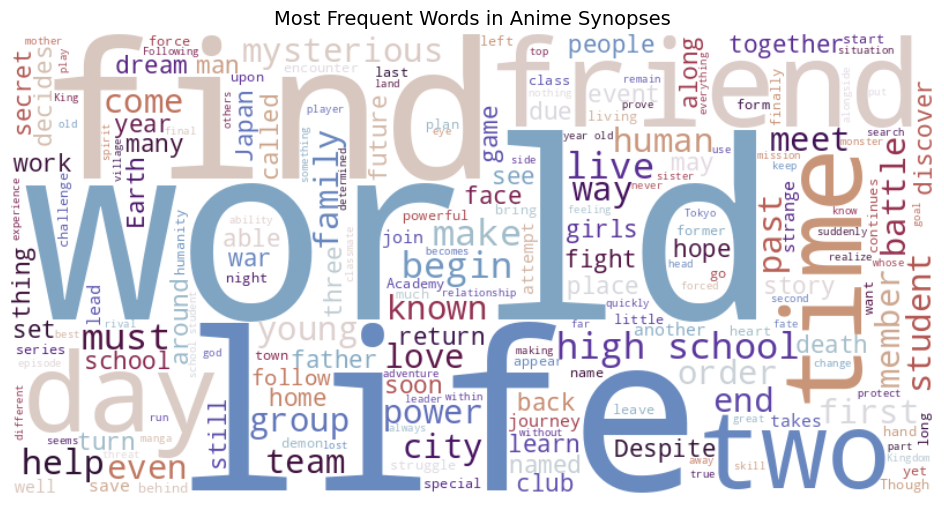

In [9]:
# === 3. Visualization ===

# 🔹 Word Cloud - Most Common Words in Anime Synopses
all_text = " ".join(df["synopsis"].dropna())

# Use custom_stopwords directly
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color="white",
    colormap="twilight",
    stopwords=custom_stopwords  # Directly pass the set/list of stopwords
).generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Most Frequent Words in Anime Synopses", fontsize=14)
plt.show()

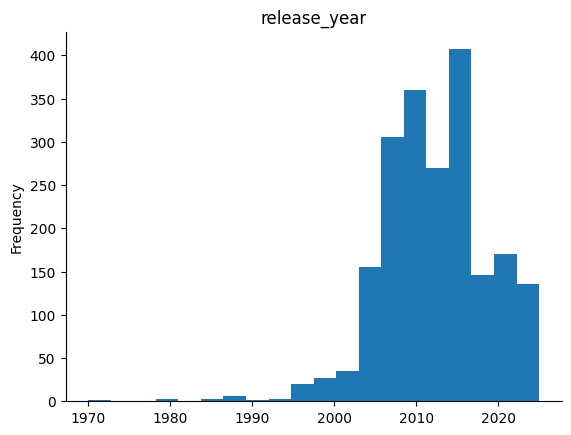

In [10]:
# @title release year

from matplotlib import pyplot as plt
df['release_year'].plot(kind='hist', bins=20, title='release_year')
plt.gca().spines[['top', 'right',]].set_visible(False)

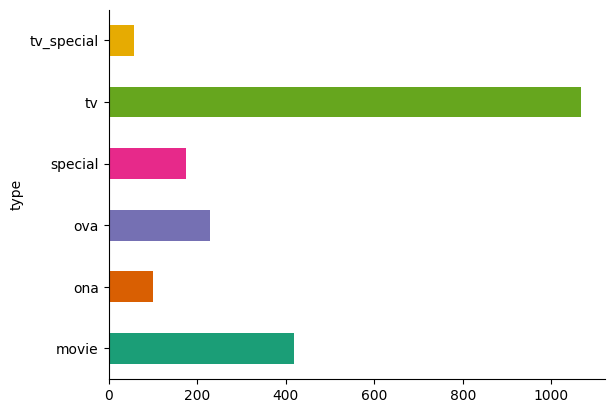

In [11]:
# @title type of media

from matplotlib import pyplot as plt
import seaborn as sns
df.groupby('type').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
# === 4. Compute Similarity ===
# Cosine similarity calculates how close two anime synopses are.
cosine_sim = cosine_similarity(synopsis_matrix, synopsis_matrix)

In [13]:
import re
from tabulate import tabulate

def recommend_anime(anime_title, top_n=20):
    """
    Recommend anime based on synopsis similarity while avoiding sequels/prequels and anime from the same universe.
    Additionally, it filters out recommendations that contain specific genres (Ecchi, Harem, Hentai, Horror)
    if the input anime doesn't contain these genres.
    """
    # Flatten title and alt_titles into one searchable list
    all_titles = df["title"].tolist() + [alt for sublist in df["alt_titles"] for alt in sublist]

    # Find best match
    match, score, _ = process.extractOne(anime_title, all_titles, scorer=fuzz.ratio)

    print(f"Match: {match}, Score: {score}")

    # Handle low similarity score
    if score < 70:
        print("Anime not found. Try checking the title.")
        return

    # Find the corresponding row in the dataframe
    match_row = df[(df["title"] == match) | (df["alt_titles"].apply(lambda x: match in x))]

    if match_row.empty:
        print("Could not find a matching anime in the dataset.")
        return

    idx = match_row.index[0]
    anime_title = df.loc[idx, "title"]
    anime_genres = df.loc[idx, "genres"]

    # Check if the input anime contains any of the filtered genres
    filtered_genres = ["Ecchi", "Harem", "Hentai", "Gore"]
    input_has_filtered_genres = any(genre in anime_genres for genre in filtered_genres)

    # Get the base title of the input anime (strip season/part info)
    input_base_title = re.sub(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', r'\1', anime_title).strip().lower()

    # Sort Similar Anime by Cosine Similarity
    # Ensure idx is within the bounds of cosine_sim
    idx = min(idx, cosine_sim.shape[0] - 1)  # Adjust idx if it's out of bounds


    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    recommendations = []

    for i, score in sim_scores:
        candidate_title = df.iloc[i]["title"]
        candidate_genres = df.iloc[i]["genres"]

        # Skip exact match
        if candidate_title.lower() == anime_title.lower():
            continue

        # Get the base title of the candidate
        candidate_base_title = re.sub(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', r'\1', candidate_title).strip().lower()

        # Skip sequels, prequels, movies, OVAs, and anything from the same series (based on base title match)
        if input_base_title in candidate_title.lower():
            continue  # Skip anything that contains the base title (like "One Piece" in the movie title)

        # If the input anime does not contain any filtered genres, exclude recommendations with those genres
        if not input_has_filtered_genres:
            if any(filtered_genre in candidate_genres for filtered_genre in filtered_genres):
                continue  # Skip recommendations with restricted genres

        # Add to recommendations
        recommendations.append((candidate_title, df.iloc[i]["score"], ", ".join(candidate_genres)))

        if len(recommendations) == top_n:
            break

    # Create DataFrame
    recommendations_df = pd.DataFrame(recommendations, columns=["Title", "Score", "Genres"])

    print("\nRecommended Anime:")
    print(tabulate(recommendations_df, headers="keys", tablefmt="pretty"))

In [18]:
# === Example General Recommendation===
user_anime = "One Piece"
print(f"\n=== Recommendations for {user_anime} ===")
recommend_anime(user_anime)


=== Recommendations for One Piece ===
Match: One Piece, Score: 100.0

Recommended Anime:
+----+-----------------------------------------------------+-------+-------------------------------------------------------------------------+
|    |                        Title                        | Score |                                 Genres                                  |
+----+-----------------------------------------------------+-------+-------------------------------------------------------------------------+
| 0  |              Seihou Bukyou Outlaw Star              | 7.83  |            Action, Adventure, Comedy, Sci-Fi, Seinen, Space             |
| 1  |                 Dr. Stone: Ryuusui                  | 8.14  |                   Adventure, Comedy, Sci-Fi, Shounen                    |
| 2  |               Niehime to Kemono no Ou               | 7.94  |                Anthropomorphic, Fantasy, Romance, Shoujo                |
| 3  |                 K: Return of Kings           

In [19]:
import re
from tabulate import tabulate

def recommend_tv_anime(anime_title, top_n=20):
    """
    Recommend TV-type anime based on synopsis similarity while avoiding sequels/prequels and anime from the same universe.
    """
    # Flatten title and alt_titles into one searchable list
    all_titles = df["title"].tolist() + [alt for sublist in df["alt_titles"] for alt in sublist]

    # Find best match
    match, score, _ = process.extractOne(anime_title, all_titles, scorer=fuzz.ratio)

    print(f"Match: {match}, Score: {score}")

    # Handle low similarity score
    if score < 70:
        print("Anime not found. Try checking the title.")
        return

    # Find the corresponding row in the dataframe
    match_row = df[(df["title"] == match) | (df["alt_titles"].apply(lambda x: match in x))]

    if match_row.empty:
        print("Could not find a matching anime in the dataset.")
        return

    idx = match_row.index[0]
    anime_title = df.loc[idx, "title"]

    # Get the base title of the input anime (strip season/part info)
    input_base_title = re.sub(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', r'\1', anime_title).strip().lower()

    # Sort Similar Anime by Cosine Similarity
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    recommendations = []

    for i, score in sim_scores:
        candidate_title = df.iloc[i]["title"]
        candidate_genres = ", ".join(df.iloc[i]["genres"])
        candidate_type = df.iloc[i]["type"].lower()  # Check type (TV, Movie, etc.)

        # Skip non-TV types
        if candidate_type != "tv":
            continue

        # Skip exact match
        if candidate_title.lower() == anime_title.lower():
            continue

        # Get the base title of the candidate
        candidate_base_title = re.sub(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', r'\1', candidate_title).strip().lower()

        # Skip sequels, prequels, movies, OVAs, and anything from the same series (based on base title match)
        if input_base_title in candidate_title.lower():
            continue  # Skip anything that contains the base title (like "One Piece" in the movie title)

        # Add to recommendations
        recommendations.append((candidate_title, df.iloc[i]["score"], candidate_genres))

        if len(recommendations) == top_n:
            break

    # Create DataFrame
    recommendations_df = pd.DataFrame(recommendations, columns=["Title", "Score", "Genres"])

    print("\nRecommended TV Anime:")
    print(tabulate(recommendations_df, headers="keys", tablefmt="pretty"))

In [20]:
# Example TV shows Only Recommendation
user_anime = "Shugo Chara"
print(f"\n=== TV Recommendations for {user_anime} ===")
recommend_tv_anime(user_anime)


=== TV Recommendations for Shugo Chara ===
Match: Shugo Chara!, Score: 95.65217391304348

Recommended TV Anime:
+----+------------------------------------------------------------+-------+------------------------------------------------------------------------------------+
|    |                           Title                            | Score |                                       Genres                                       |
+----+------------------------------------------------------------+-------+------------------------------------------------------------------------------------+
| 0  |       Bishoujo Senshi Sailor Moon Crystal Season III       | 7.77  |                           Mahou Shoujo, Romance, Shoujo                            |
| 1  |                    Seitokai Yakuindomo                     | 7.54  |                         Comedy, Gag Humor, School, Shounen                         |
| 2  |                Fumetsu no Anata e Season 2                 | 8.09  |       

In [22]:
import re
from tabulate import tabulate

def recommend_movie_anime(anime_title, top_n=20):
    """
    Recommend movie-type anim ue based on synopsis similarity while avoiding sequels/prequels and anime from the same universe.
    """
    # Flatten title and alt_titles into one searchable list
    all_titles = df["title"].tolist() + [alt for sublist in df["alt_titles"] for alt in sublist]

    # Find best match
    match, score, _ = process.extractOne(anime_title, all_titles, scorer=fuzz.ratio)

    print(f"Match: {match}, Score: {score}")

    # Handle low similarity score
    if score < 70:
        print("Anime not found. Try checking the title.")
        return

    # Find the corresponding row in the dataframe
    match_row = df[(df["title"] == match) | (df["alt_titles"].apply(lambda x: match in x))]

    if match_row.empty:
        print("Could not find a matching anime in the dataset.")
        return

    idx = match_row.index[0]
    anime_title = df.loc[idx, "title"]

    # Get the base title of the input anime (strip season/part info)
    input_base_title = re.sub(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', r'\1', anime_title).strip().lower()

    # Sort Similar Anime by Cosine Similarity
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    recommendations = []

    for i, score in sim_scores:
        candidate_title = df.iloc[i]["title"]
        candidate_genres = ", ".join(df.iloc[i]["genres"])
        candidate_type = df.iloc[i]["type"].lower()  # Check type (TV, Movie, etc.)

        # Skip non-Movie types
        if candidate_type != "movie":
            continue

        # Skip exact match
        if candidate_title.lower() == anime_title.lower():
            continue

        # Get the base title of the candidate
        candidate_base_title = re.sub(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', r'\1', candidate_title).strip().lower()

        # Skip sequels, prequels, and anything from the same series (based on base title match)
        if input_base_title in candidate_title.lower():
            continue  # Skip anything that contains the base title (like "One Piece" in the movie title)

        # Add to recommendations
        recommendations.append((candidate_title, df.iloc[i]["score"], candidate_genres))

        if len(recommendations) == top_n:
            break

    # Create DataFrame
    recommendations_df = pd.DataFrame(recommendations, columns=["Title", "Score", "Genres"])

    print("\nRecommended Movie Anime:")
    print(tabulate(recommendations_df, headers="keys", tablefmt="pretty"))

In [23]:
# Example Movies Only Recommendation
user_anime = "Summer Wars"
print(f"\n=== Recommendations for {user_anime} ===")
recommend_movie_anime(user_anime)


=== Recommendations for Summer Wars ===
Match: Summer Wars, Score: 100.0

Recommended Movie Anime:
+----+----------------------------------------------------------------+-------+-------------------------------------------------------------------------------------------------------+
|    |                             Title                              | Score |                                                Genres                                                 |
+----+----------------------------------------------------------------+-------+-------------------------------------------------------------------------------------------------------+
| 0  |                      Koukaku Kidoutai 2.0                      | 7.96  |        Action, Adult Cast, Detective, Mecha, Mystery, Psychological, Sci-Fi, Seinen, Suspense         |
| 1  | Koukaku Kidoutai: Stand Alone Complex - Solid State Society 3D | 7.72  |                Action, Adult Cast, Detective, Mecha, Military, Mystery, Sci-Fi, Sein

In [ ]:
# @title test get anime by genres shoujo
#def get_anime_genres(anime_title):
#    """
#    Returns the genres of an anime.
#    """
#    anime_data = df[df["title"] == anime_title]
#    if not anime_data.empty:
#        return anime_data["genres"].values[0]
#    else:
#        return None  # Or raise an exception if you prefer
#
## Example usage:
#anime_title = "Shugo Chara"
#genres = get_anime_genres(anime_title)
#
#if genres:
#    print(f"Genres of {anime_title}: {genres}")
#else:
#    print(f"Anime '{anime_title}' not found.")

In [ ]:
# @title test 2 fecth shoujo
#def fetch_more_shoujo_anime(current_df, limit=500): # Added current_df as an argument
#    url = f"{BASE_URL}/anime"
#    headers = {"X-MAL-CLIENT-ID": CLIENT_ID}
#    params = { # Define params inside fetch_more_shoujo_anime
#        "genres": "shoujo",
#        "limit": 100,  # Fetch 10 more items
#        "fields": "id,title,alternative_titles,genres,mean,num_list_users,synopsis,start_date,media_type"
#    }
#    new_data = [] # Initialize new_data
#
#    for i in range(10):  # Iterate through pages (if needed)
#        params["offset"] = i * 100  # Adjust offset for pagination
#        response = requests.get(url, headers=headers, params=params)
#
#        if response.status_code == 200:
#            new_data.extend(response.json()["data"])
#        else:
#            print(f"Error fetching data: {response.status_code}, {response.json()}")
#            break  # Stop if there's an error
#
#    # Create a DataFrame from the new data
#    new_df = pd.DataFrame([
#        {
#            "id": anime["node"]["id"],
#            "title": anime["node"]["title"],
#            "alt_titles": anime["node"].get("alternative_titles", {}).get("synonyms", []) +
#                          [anime["node"].get("alternative_titles", {}).get("en", ""),
#                           anime["node"].get("alternative_titles", {}).get("ja", "")],
#            "genres": [g["name"] for g in anime["node"].get("genres", [])],
#            "score": anime["node"].get("mean", 0),
#            "popularity": anime["node"].get("num_list_users", 0),
#            "synopsis": anime["node"].get("synopsis", ""),
#            "release_year": int(anime["node"].get("start_date", "0000-00-00").split("-")[0]) if anime["node"].get("start_date") else None,
#            "type": anime["node"].get("media_type", None),
#        }
#        for anime in new_data
#    ])

#    # Concatenate the new DataFrame with the existing one
#    return pd.concat([current_df, new_df], ignore_index=True)
#
#
## Fetch and append new anime
#new_df = fetch_more_shoujo_anime(df) # Pass df to fetch_more_shoujo_anime
#
## Display the first few rows of the updated DataFrame (optional)
#new_df.head()

In [ ]:
pivot = df.pivot_table(index=['id'], columns=['title'], values='score')
pivot.head()

title,.hack//G.U. Trilogy,.hack//The Movie: Sekai no Mukou ni,3-gatsu no Lion,3-gatsu no Lion 2nd Season,86,86 Part 2,AKB0048: Next Stage,Acchi Kocchi,Acchi Kocchi: Place=Princess,Afro Samurai,...,[Oshi no Ko],[Oshi no Ko] 2nd Season,ef: A Tale of Melodies.,ef: A Tale of Memories.,ef: A Tale of Memories. - Prologue,xxxHOLiC,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,xxxHOLiC◆Kei
id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# @title test hybrid approach 1
# === 3. 1️⃣ Hybrid Approach (t-SNE Clustering Based on Anime Genres with K-Means)===
#at first we didn't really base our cluster on anything so it didn't make any
#sense, we decided to base it on 5 clusters based on the top 5 genres
from sklearn.cluster import KMeans
import numpy as np

# 🔹 Step 1: Extract Features (TF-IDF on Synopses)
vectorizer = TfidfVectorizer(stop_words=custom_stopwords)
synopsis_matrix = vectorizer.fit_transform(df_filtered["synopsis"])

# 🔹 Step 2: Apply K-Means Clustering (5 Clusters)
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)
df_filtered["cluster"] = kmeans.fit_predict(synopsis_matrix)

# 🔹 Step 3: Reduce Dimensionality and get 2D coordinates for visualization with t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
synopsis_2d = tsne.fit_transform(synopsis_matrix.toarray())

# Assign t-SNE results to dataframe
df_filtered["x"] = synopsis_2d[:, 0]
df_filtered["y"] = synopsis_2d[:, 1]

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:402: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['aren', 'couldn', 'didn', 'doesn', 'don', 'hadn', 'hasn', 'haven', 'isn', 'let', 'll', 'mal', 'mustn', 're', 'shan', 'shouldn', 've', 'wasn', 'weren', 'won', 'wouldn', 'written'] not in stop_words.
  warnings.warn(
<ipython-input-96-81625cc3a038>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["cluster"] = kmeans.fit_predict(synopsis_matrix)
<ipython-input-96-81625cc3a038>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats

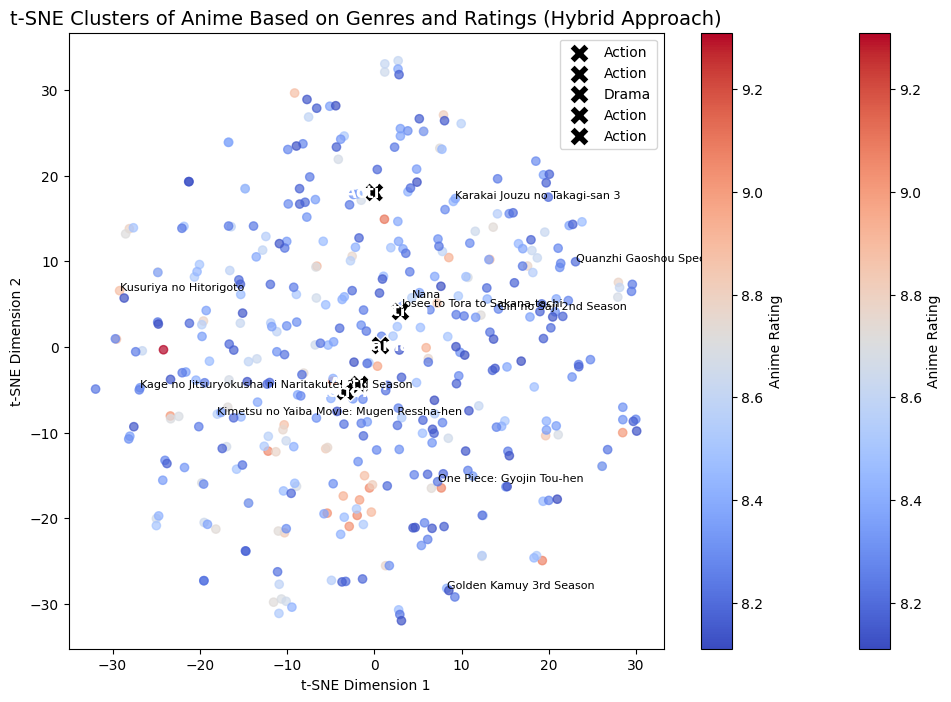

In [ ]:
# @title test 2 === Plotting t-SNE Clusters with K-Means Labels ===

# Set up colors based on anime ratings
cmap = plt.get_cmap("coolwarm")
norm = plt.Normalize(vmin=df_filtered["score"].min(), vmax=df_filtered["score"].max())
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)

fig, ax = plt.subplots(figsize=(12, 8))

# Scatter plot of anime based on t-SNE coordinates, colored by ratings
scatter = ax.scatter(df_filtered["x"], df_filtered["y"], c=df_filtered["score"], cmap="coolwarm", alpha=0.7)
plt.colorbar(sm, ax=ax, label="Anime Rating")

# Add colorbar for ratings
plt.colorbar(sm, ax=ax, label="Anime Rating")

# Label cluster centers with the most common genre in each cluster
for cluster_id in range(5):
    cluster_data = df_filtered[df_filtered["cluster"] == cluster_id]
    center_x, center_y = cluster_data["x"].mean(), cluster_data["y"].mean()
    most_common_genre = cluster_data["genre_label"].mode()[0]

    ax.scatter(center_x, center_y, color='black', marker="X", s=200, edgecolors="white", label=most_common_genre)
    ax.text(center_x, center_y, most_common_genre, fontsize=12, fontweight='bold', ha='center', va='center', color="white")

# Label a few anime titles
for i in np.random.choice(len(df_filtered), size=10, replace=False):
    ax.text(df_filtered["x"].iloc[i], df_filtered["y"].iloc[i], df_filtered["title"].iloc[i], fontsize=8)

# Title and labels
ax.set_title("t-SNE Clusters of Anime Based on Genres and Ratings (Hybrid Approach)", fontsize=14)
ax.set_xlabel("t-SNE Dimension 1")
ax.set_ylabel("t-SNE Dimension 2")

# Show legend for cluster genre labels
ax.legend()

# Show the plot
plt.show()

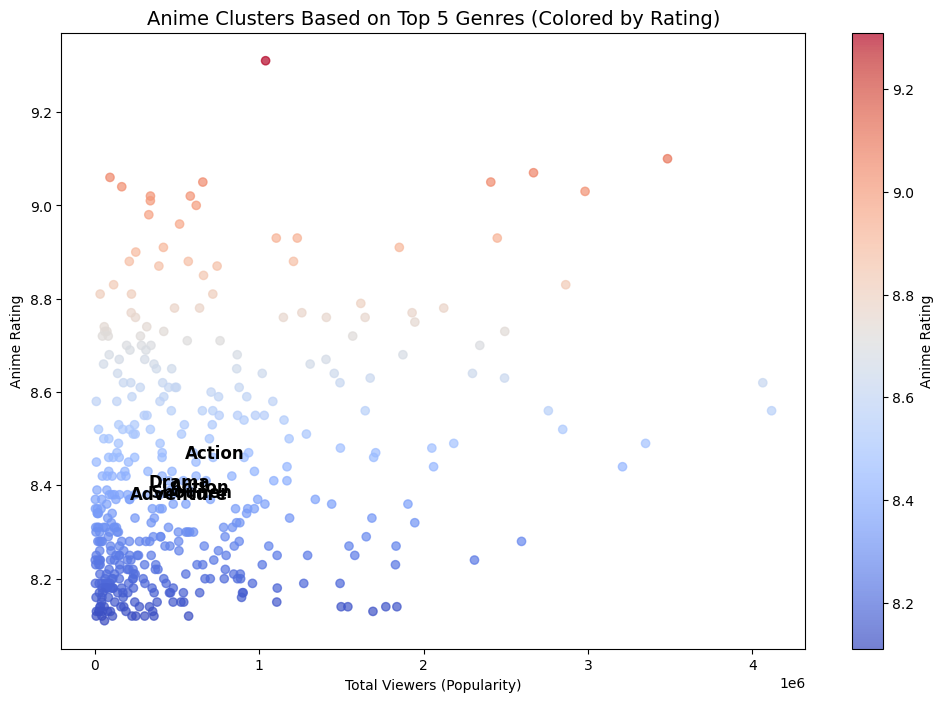

In [ ]:
# @title test 3 === 2️⃣ K-Means Only Clustering (Without t-SNE) ===

# Assuming df_filtered contains the anime data with genres and ratings

# 1. Get top 5 genres
top_genres = df_filtered['genres'].explode().value_counts().head(5).index.tolist()

# 2. Filter dataframe for anime with top genres
df_filtered = df_filtered[df_filtered['genres'].apply(lambda x: any(genre in x for genre in top_genres))]

# 3. Encode genres for clustering
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_filtered['genre_label'] = le.fit_transform(df_filtered['genres'].astype(str))

# 4. Apply K-Means clustering based on genre labels
kmeans = KMeans(n_clusters=5, random_state=42, n_init=10)  # 5 clusters for top 5 genres
df_filtered['cluster'] = kmeans.fit_predict(df_filtered[['genre_label']]) # Clustering based on genre labels

# 5. No Dimensionality Reduction - Use 'popularity' for x-axis directly
# We no longer need PCA since we're using 'popularity' for the x-axis

# 6. Visualization
fig, ax = plt.subplots(figsize=(12, 8))

# a. Scatter plot: x-axis is 'popularity', y-axis is 'score', color by 'score'
scatter = ax.scatter(df_filtered['popularity'], df_filtered['score'], c=df_filtered['score'], cmap='coolwarm', alpha=0.7)

# b. Colorbar for ratings
plt.colorbar(scatter, ax=ax, label='Anime Rating')

# c. Label cluster centers with most common genre
for cluster_id in range(5):
    cluster_data = df_filtered[df_filtered['cluster'] == cluster_id]
    center_x = cluster_data['popularity'].mean()  # Use mean popularity for x-axis
    center_y = cluster_data['score'].mean()  # Use mean score for y-axis
    most_common_genre = cluster_data['genres'].explode().mode()[0]  # Get most common genre
    ax.text(center_x, center_y, most_common_genre, fontsize=12, fontweight='bold', ha='center', va='center', color="black")

# d. Set title and labels
ax.set_title('Anime Clusters Based on Top 5 Genres (Colored by Rating)', fontsize=14)
ax.set_xlabel('Total Viewers (Popularity)')  # Changed x-axis label
ax.set_ylabel('Anime Rating')

# e. Show plot
plt.show()

In [ ]:
#@title original recommend tv code
#import re  # Import regular expressions (if not already imported)

def is_same_series(title1, title2):
    """
    Checks if two anime titles belong to the same series, ignoring season/part info.
    """
    # Remove season/part info using regex
    base_title1 = re.sub(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', r'\1', title1).strip()
    base_title2 = re.sub(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', r'\1', title2).strip()

    return base_title1 == base_title2


def recommend_anime_tv(anime_title, top_n=10):
    """
    Recommend TV anime based on synopsis similarity while avoiding sequels/prequels.

    Args:
        anime_title (str): The title of the anime to find recommendations for.
        top_n (int, optional): The number of recommendations to return. Defaults to 10.

    Returns:
        pd.DataFrame: A DataFrame containing the recommended anime titles and their scores.
    """

    # 🔹 Handle Typos & Alternative Titles
    match, score, _ = process.extractOne(anime_title, df["title"], scorer=fuzz.ratio)
    if score < 70:
        return "Anime not found. Try checking the title."

    anime_title = match  # Update anime_title to the best match
    idx = df[df["title"] == anime_title].index[0]

    # 2. Get the base title of the input anime
    input_base_title = re.sub(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', r'\1', anime_title).strip()

    # 🔹 Sort Similar Anime by Cosine Similarity
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    recommendations = []
    original_recommendations = []  # Store original recommendations before filtering

    for i, score in sim_scores:
        candidate_title = df.iloc[i]["title"]
        original_recommendations.append(candidate_title)

        # 3. Check if candidate is from the same series as input
        candidate_base_title = re.sub(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', r'\1', candidate_title).strip()
        if is_same_series(input_base_title, candidate_base_title):
            continue  # Skip if from the same series

        # Filter for "tv" type
        if df.iloc[i]["type"] == "tv":
            # Check if the candidate is part of a series
            series_match = re.search(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', candidate_title)
            if series_match:
                base_title = series_match.group(1).strip()

                # Check if the base title or any related title is already recommended
                if any(is_same_series(base_title, rec[0]) for rec in recommendations):
                    continue  # Skip if base title or related title is already recommended

                recommendations.append((base_title, df.iloc[i]["score"]))  # Recommend the base title

            else:
                # For non-series titles, check if it's related to an already recommended title
                if not any(is_same_series(candidate_title, rec[0]) for rec in recommendations):
                    recommendations.append((candidate_title, df.iloc[i]["score"]))

        if len(recommendations) == top_n:
            break

    # Create DataFrame
    recommendations_df = pd.DataFrame(recommendations, columns=["title", "score"])

    # Find and format the note about changed recommendations
    changed_recommendations = [
        rec for rec in original_recommendations
        if re.search(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', rec)
        and not any(is_same_series(rec, r_title) for r_title in recommendations_df['title'])
    ]

    if changed_recommendations:
        note = "Note: The following recommendations were changed to the base title to avoid redundancy:\n - " + "\n - ".join(changed_recommendations)
        print(note)

    return recommendations_df  # Return the DataFrame

In [ ]:
#@title example original recommend tv
# === Example ===
user_anime = "Spy x Family"
print(f"\n=== Recommendations for {user_anime} ===")
print(recommend_anime_tv(user_anime))


=== Recommendations for Spy x Family ===
Note: The following recommendations were changed to the base title to avoid redundancy:
 - Spy x Family Part 2
 - Spy x Family Movie: Code: White
 - Meitantei Conan Movie 20: Junkoku no Nightmare
                       title  score
0               Spy x Family   8.23
1    Toaru Kagaku no Railgun   7.65
2  Toaru Kagaku no Railgun T   8.15
3         Grisaia no Kajitsu   7.46
4              Maison Ikkoku   8.19
5          Zankyou no Terror   8.08
6         Danball Senki Wars   7.02
7            Puchi Pri*Yucie   7.40
8            Meitantei Conan   8.17
9          Durarara!!x2 Shou   7.97


In [ ]:
#@title original recommend movie code
import re  # Import regular expressions (if not already imported)

def is_same_series(title1, title2):
    """
    Checks if two anime titles belong to the same series, ignoring season/part info.
    """
    # Remove season/part info using regex
    base_title1 = re.sub(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', r'\1', title1).strip()
    base_title2 = re.sub(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', r'\1', title2).strip()

    return base_title1 == base_title2


def recommend_anime_movie(anime_title, top_n=10):
    """
    Recommend Movie anime based on synopsis similarity,
    considering alternative titles, ignoring dots, and avoiding redundancy.
    """
    # 🔹 Preprocess Input Title (Remove Dots)
    anime_title = re.sub(r'\.', '', anime_title)  # Remove dots from input title

    # 🔹 Find Best Matching Title (Including Alt Titles)
    all_titles = df['title'].tolist() + df['alt_titles'].explode().tolist()
    # Remove dots from all titles for matching
    all_titles_no_dots = [re.sub(r'\.', '', title) for title in all_titles]
    match, score, _ = process.extractOne(anime_title, all_titles_no_dots, scorer=fuzz.ratio)

    if score < 70:
        return "Anime not found. Try checking the title."

    # 🔹 Get Anime Index (Handling Alt Titles)
    # Find the original title (with dots) in either 'title' or 'alt_titles'
    original_match = all_titles[all_titles_no_dots.index(match)]

    if original_match in df['title'].values:
        idx = df[df['title'] == original_match].index[0]
    else:
        idx = df[df['alt_titles'].apply(lambda x: original_match in x)].index[0]

    # 2. Get the base title of the input anime
    input_base_title = re.sub(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', r'\1', original_match).strip()

    # 🔹 Sort Similar Anime by Cosine Similarity
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    recommendations = []
    original_recommendations = []  # Store original recommendations before filtering

    for i, score in sim_scores:
        candidate_title = df.iloc[i]["title"]
        original_recommendations.append(candidate_title)

        # 3. Check if candidate is from the same series as input
        candidate_base_title = re.sub(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', r'\1', candidate_title).strip()
        if is_same_series(input_base_title, candidate_base_title):
            continue  # Skip if from the same series

        # Filter for "movie" type
        if df.iloc[i]["type"] == "movie":
            # Check if the candidate is part of a series
            series_match = re.search(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', candidate_title)
            if series_match:
                base_title = series_match.group(1).strip()

                # Check if the base title or any related title is already recommended
                if any(is_same_series(base_title, rec[0]) for rec in recommendations):
                    continue  # Skip if base title or related title is already recommended

                recommendations.append((base_title, df.iloc[i]["score"]))  # Recommend the base title

            else:
                # For non-series titles, check if it's related to an already recommended title
                if not any(is_same_series(candidate_title, rec[0]) for rec in recommendations):
                    recommendations.append((candidate_title, df.iloc[i]["score"]))

        if len(recommendations) == top_n:
            break

    # Create DataFrame
    recommendations_df = pd.DataFrame(recommendations, columns=["title", "score"])

    # Find and format the note about changed recommendations
    changed_recommendations = [
        rec for rec in original_recommendations
        if re.search(r'(.*?)(:|\sSeason\s|\sPart\s|\s\d)', rec)
        and not any(is_same_series(rec, r_title) for r_title in recommendations_df['title'])
    ]

    if changed_recommendations:
        note = "Note: The following recommendations were changed to the base title to avoid redundancy:\n - " + "\n - ".join(changed_recommendations)
        print(note)

    return recommendations_df  # Return the DataFrame

In [ ]:
#@title example original recommend movie
# === Example ===
user_anime = "Spy x Family"
print(f"\n=== Recommendations for {user_anime} ===")
print(recommend_anime_movie(user_anime))


=== Recommendations for Spy x Family ===
Note: The following recommendations were changed to the base title to avoid redundancy:
 - Spy x Family Part 2
 - Spy x Family Movie: Code: White
 - Meitantei Conan Movie 20: Junkoku no Nightmare
 - Final Fantasy VII: Advent Children
 - Crayon Shin-chan Movie 19: Arashi wo Yobu Ougon no Spy Daisakusen
 - Yozakura Quartet: Hana no Uta
 - Ayakashi: Japanese Classic Horror
 - Love Live! School Idol Project 2nd Season
 - Fate/stay night Movie: Heaven's Feel - III. Spring Song
 - Cyberpunk: Edgerunners
 - Kidou Senshi Gundam: The Origin - Zenya Akai Suisei
 - Major: Message
 - Kara no Kyoukai Movie 6: Boukyaku Rokuon
                             title  score
0               Spy x Family Movie   8.13
1            Meitantei Conan Movie   8.17
2                 Koukaku Kidoutai   8.27
3                Final Fantasy VII   7.71
4           Crayon Shin-chan Movie   7.00
5            Fate/stay night Movie   8.65
6  Yoru wa Mijikashi Arukeyo Otome   8.18
7 